In [ ]:
"""Implement a simple object detection framework using CNNs. Use a dataset like PASCAL VOC
for training and evaluating the model. Discuss the challenges involved in adapting CNNs from
image classification to object detection."""

4/4 [==============================] - 29s 6s/step


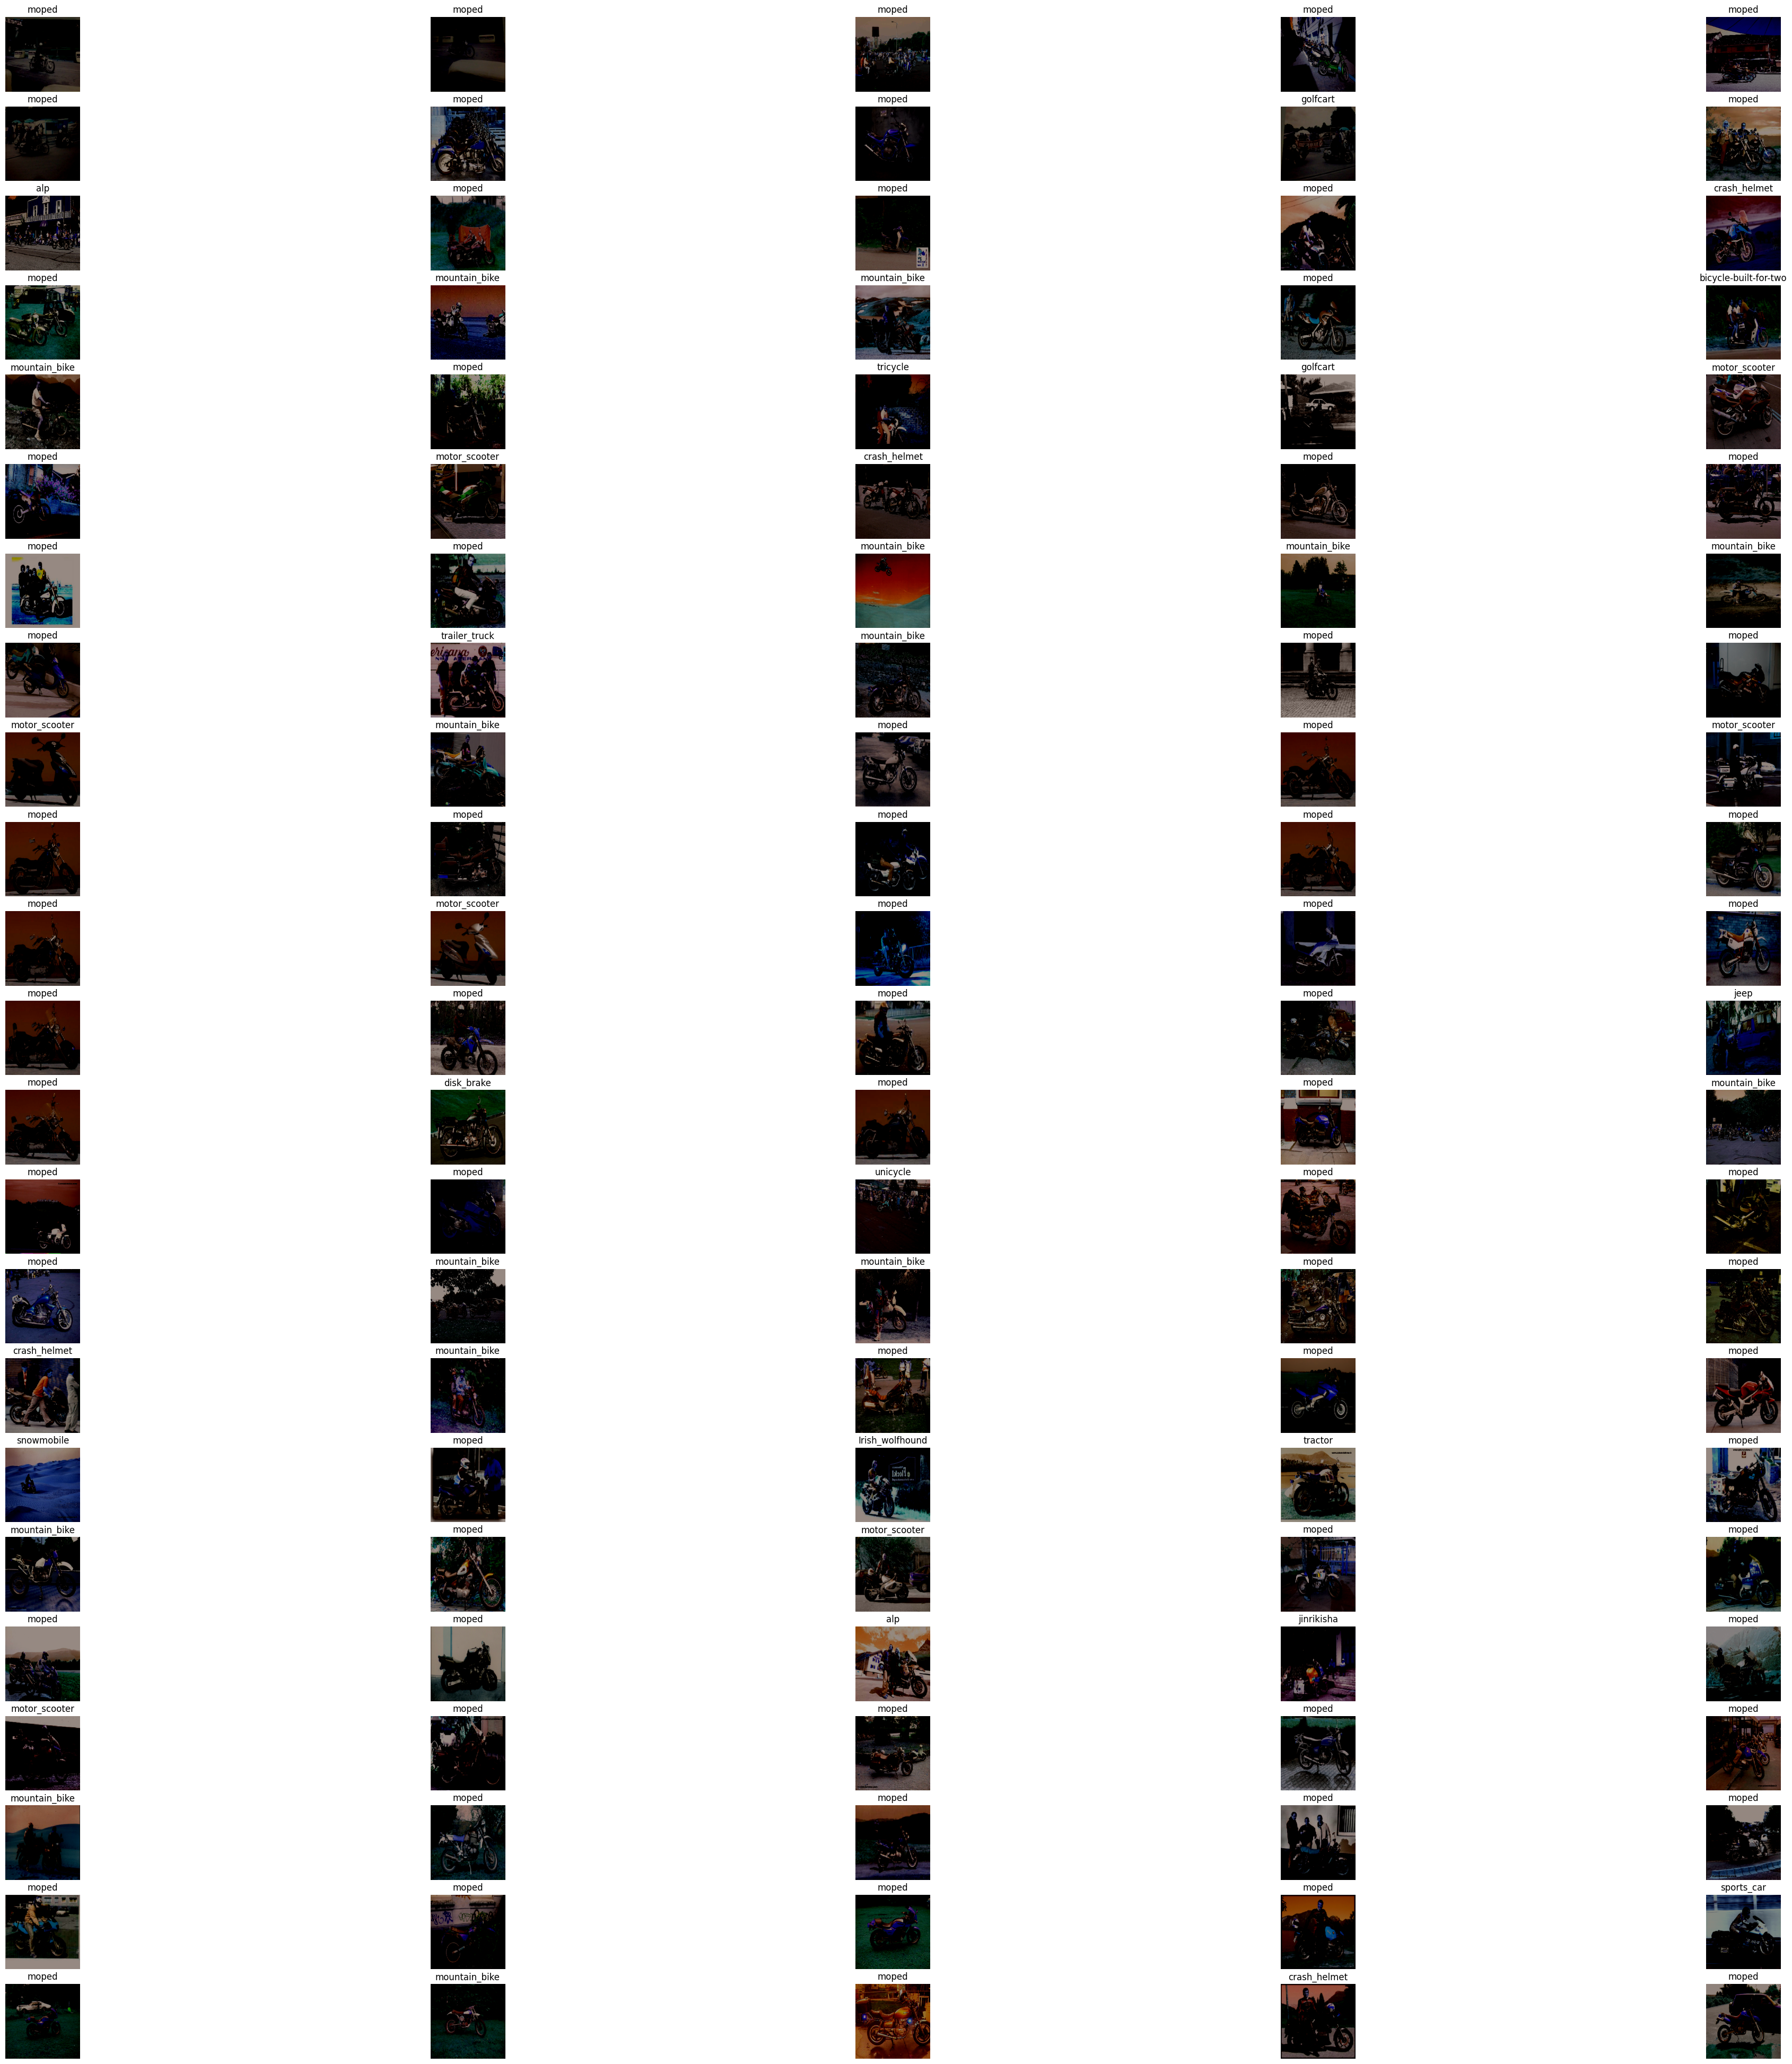

In [11]:
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.models import Model
import numpy as np
import os
import matplotlib.pyplot as plt

class Detect:
    def __init__(self, img_dir='/content/drive/MyDrive/TUDarmstadt/PNGImages'):
        self.img_dir = img_dir
        self.cnt = 0
        self.batch_holder = None
        self.model = ResNet50(weights='imagenet')  # Use 'imagenet' weights

    def read_images(self):
        self.cnt = len(os.listdir(self.img_dir))
        self.batch_holder = np.zeros((self.cnt, 224, 224, 3))
        for i, img in enumerate(os.listdir(self.img_dir)):
            img = image.load_img(os.path.join(self.img_dir, img), target_size=(224, 224))
            img = image.img_to_array(img)
            self.batch_holder[i, :] = img
        self.batch_holder = preprocess_input(self.batch_holder)
        return self.batch_holder

    def predict(self):
        fig = plt.figure(figsize=(50, 50))
        results = self.model.predict(self.batch_holder)
        for i, img in enumerate(self.batch_holder):
            fig.add_subplot(23,5, i+1)
            plt.title(decode_predictions(results, top=1)[i][0][1])
            plt.axis('off')
            plt.imshow(img / 256.)
        plt.show()

# Usage:
detector = Detect('/content/drive/MyDrive/TUDarmstadt/PNGImages/motorbike-testset')
detector.read_images()
detector.predict()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
